# PHYS 3317 -- Tunneling

<font color="red"><em> Lee Swindell </em></font>

Work in units where $\hbar=m=1$ consider a box of length $L=40$, with hard wall boundary conditions.  Use a grid spacing $dx=0.02$.  
<ul>
<li> Create a potential which is zero, except for between $x=20$ to $x=20.2$, where the potential has height $V_0=800$. </li>
<li>Plot the potential. </li>
<li>Create a Gaussian wavepacket centered at $x=4$ with wave-vector $k=12\pi$ and width $\delta x=1$</li>
<li>Plot this wavepacket</li>
<li>Use the <em>tdseviewer</em> package to animate the time evolution of this wavepacket.  Use a timestep dt=0.0001, and integrate from time t=0 to time t=1.  Plot only one frame out of 100.  Store the time-series of the wavefunction.</li>
<li>You should find that the wave-packet splits into two, with one part passing through the barrier, and the other reflecting.</li>
<li>Analyze your stored time-series to calculate the probability that the wavepacket passes through the barrier.</li>
<li>Repeat for barriers with thicknesses 0.4 and 0.8.</li>
<li>Make a plot of the logarithm of the barrier penetration probability versus barrier thickness.</li>
</ul>

In [6]:
%pylab inline
from __future__ import division
from scipy.sparse import *
from showmat import showmat
%gui tk
import TDSEviewer4
from TDSEviewer4 import *
import scipy.sparse.linalg as linalg
import scipy.sparse as sparse

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [8]:
#Create Potential

xgrid=arange(0,40,.02)
xbarrier=arange(20,20.2,.02)
pot=concatenate([0*arange(0,20,.02),800*xbarrier/xbarrier,0*arange(20.2,40,.02)])

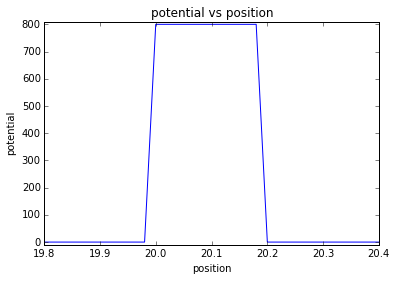

In [9]:
#Plot Potential
plot (xgrid,pot)
axis([19.8,20.4,-10,810])
xlabel('position')
ylabel('potential')
title('potential vs position')

In [10]:
def SecondDerivMatrix(numpoints,dx,periodic) : 
    """SecondDerivMatrix(numpoints,dx,periodic) returns a sparse matrix
    which represents the second derivative -- using a 3-point derivative.  

    It takes periodic needed arguments:
    numpoints -- an integer which is how many points are in the grid
    dx -- the real space lattice spacing
    periodic -- do we use periodic boundary conditions?

    Setting periodic to "False" will give "hard wall boundaries"
    """
    unitlist=ones(numpoints)  # just a list of 1's whose length is equal to the length of the grid
    if periodic :
        return dia_matrix(       # we are generating a sparse matrix by specifying the diagonals
            ((unitlist/(dx**2),unitlist/(dx**2),-2*unitlist/(dx**2),unitlist/(dx**2),unitlist/(dx**2)),
            (1,-1,0,numpoints-1,1-numpoints)),  # this line specifies which diagonals
            shape=(numpoints,numpoints))
    else :
        return dia_matrix(       # we are generating a sparse matrix by specifying the diagonals
            ((unitlist/(dx**2),unitlist/(dx**2),-2*unitlist/(dx**2)),
            (1,-1,0)),  # this line specifies which diagonals
            shape=(numpoints,numpoints))
    
def PotentialMatrix(potential):
    """PotentialMatrix(potential)
    generates a finite difference approximation to the operator V(x).
    It is called by the following arguments:
    potential -- the list of the potential values
    """

    ln=len(potential)
    return dia_matrix((potential,0),shape=(ln,ln))
    
def HamiltonianMatrix(potential,dx,periodic=True,hbar=1,mass=1):
    """HamiltonianMatrix(potential,dx,hbar=1,mass=1)
    generates a finite difference approximation to the hamiltonian operator H
    for the case of a single particle in a potential V(x)

    It is called by the following required arguments:
    potential -- a list of values for the potential
    dx -- the grid spacing
    
    It also has two optional arguments, which are assumed to be equal to unity if they
    are not specified
    hbar -- Planck's constant divided by 2 pi
    mass -- the particle mass
    """
    numpoints=len(potential)
    kin=-(0.5*hbar**2/mass)*SecondDerivMatrix(numpoints=numpoints,dx=dx,periodic=periodic) # calculate kinetic energy operator
    pot=PotentialMatrix(potential) #calculate potential energy operator
    return kin+pot

In [11]:

dt=0.0001  # set time step

dx=0.02  # set x step
hardwallham=HamiltonianMatrix(potential=pot,dx=dx,periodic=False) #make Hamiltonian

csrham=csc_matrix(hardwallham)                              # convert to more efficient format
hamsize=hardwallham.shape[0]                                # figure out how big the matrix is
LHSOperator=sparse.identity(hamsize,dtype=complex,format="csc")+0.5j*dt*csrham # Operator on Left
inverseLHS=linalg.factorized(LHSOperator) # A function which essentially acts like the inverse matrix
RHSOperator=sparse.identity(hamsize,dtype=complex,format="csc")-0.5j*dt*csrham # Operator on right

In [12]:
#Create Wavepacket

def wavepacket(xgrid,x,k,width):
    return exp(1.j*k*xgrid-(xgrid-x)**2/(2*width**2))

wp=wavepacket(xgrid,4.,12.*pi,1)

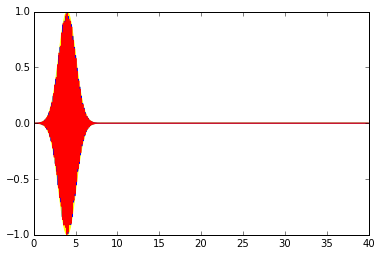

In [13]:
#Plot Wavepacket

fill_between(xgrid,abs(wp),-abs(wp),alpha=1,color="yellow")
plot(xgrid,real(wp),color="blue")
plot(xgrid,imag(wp),color="red")

In [19]:
#Animate Wavepacket

viewer=TDSEviewer(wavefunction=wp,grid=xgrid)

TclError: 

In [40]:
# initialize
t=0.
viewer.ylim(-1,1)
viewer.wavefunction=wp
viewer.xlim(0,40)

counter=0
# loop over timesteps
while t<1.:
    viewer.wavefunction=inverseLHS(RHSOperator.dot(viewer.wavefunction))
    if counter%100==0:
        viewer.updatelines()
        viewer.set_title(t)
    t=t+dt
    counter=counter+1

viewer.force_redraw()

In [ ]:
#Store timeseries

wfseries=array([wf for time,wf in timeseries])

In [ ]:
#With barrier thickness .4

xbarrier=arange(20,20.4,.02)
pot=concatenate([0*arange(0,20,.02),800*xbarrier/xbarrier,0*arange(20.4,40,.02)])

In [ ]:
viewer=TDSEviewer(wavefunction=wp,grid=xgrid)

In [ ]:
# initialize
t=0.
viewer.ylim(-1,1)
viewer.wavefunction=wp
viewer.xlim(0,40)

counter=0
# loop over timesteps
while t<1.:
    viewer.wavefunction=inverseLHS(RHSOperator.dot(viewer.wavefunction))
    if counter%100==0:
        viewer.updatelines()
        viewer.set_title(t)
    t=t+dt
    counter=counter+1

viewer.force_redraw()

In [ ]:
wfseries2=array([wf for time,wf in timeseries])

In [5]:
#With barrier thickness .8

xbarrier=arange(20,20.8,.02)
pot=concatenate([0*arange(0,20,.02),800*xbarrier/xbarrier,0*arange(20.8,40,.02)])

In [ ]:
viewer=TDSEviewer(wavefunction=wp,grid=xgrid)

In [ ]:
# initialize
t=0.
viewer.ylim(-1,1)
viewer.wavefunction=wp
viewer.xlim(0,40)

counter=0
# loop over timesteps
while t<1.:
    viewer.wavefunction=inverseLHS(RHSOperator.dot(viewer.wavefunction))
    if counter%100==0:
        viewer.updatelines()
        viewer.set_title(t)
    t=t+dt
    counter=counter+1

viewer.force_redraw()

In [ ]:
wfseries3=array([wf for time,wf in timeseries])